In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path
import pylab as py 
import statsmodels.api as sm
import scipy


pd.options.display.max_rows = 100
%matplotlib inline


pot_do_podatkov = os.path.join('D:\Faks\Projektna_analiza_podatkov\Analiza-furryjev', 'furs_podatki')

furs = pd.read_csv(pot_do_podatkov)
Count_species = furs.groupby('Species').size().sort_values(ascending=False)
Count_owner_g = furs.groupby('Owner_Gender').size()
Count_fur_g = furs.groupby('Fur_Gender').size()

## Število živalskih vrst 
Za začetek si oglejmo najpogostejše vrste živali.  
Predpostavil sem, da bodo najpogostejše živali iz redu zveri, kar podatki, z izjemo zmaja na petem mestu, potrjujejo.  
Naslednje vrste, ki izstopajo iz tega vzorca, so zajec na trinajstem, kenguru na sedemnajstem in konj na devetnajstem mestu.

In [204]:
Count_species.head(20)

Species
wolf               483
fox                426
dog                307
husky              265
dragon             204
cat                172
lion               103
tiger               98
coyote              79
german shepherd     64
bear                62
raccoon             54
bunny               52
skunk               49
hyena               46
fennec              46
kangaroo            44
arctic fox          43
horse               43
snow leopard        42
dtype: int64

Najredkejše živalske vrste si težko sistematsko ogledamo,
saj se velik del vrst pojavi le nekajkrat in najpogosteje samo enkrat.

In [211]:
def equals1(x):
    return x == 1

Filter = Count_species.apply(equals1)
len(Count_species[Filter])

60

Vprašamo se lahko torej o porazdelitvi vrst glede na pogostost, pred tem pa si oglejmo še graf števila pojavitev vsake vrste.  
Za lažjo berljivost sem odstranil oznake na x osi, predstavljene so vrednosti za 225 različnih vrst.

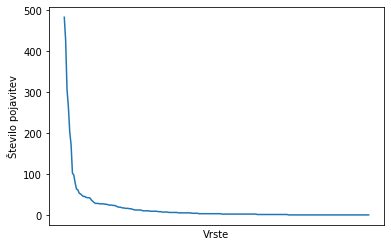

In [62]:
plt.plot(Count_species)
plt.xticks([])
plt.xlabel('Vrste')
plt.ylabel('Število pojavitev')
plt.show()

Kot pričakovano, graf spominja na obratno sorazmerno krivuljo  y = k/x + m, kjer je y število pojavitev, x indeks vrste, k in m pa konstanti.  
Najbolj ustrezni konstanti lahko poiščemo tako, da poiščemo linearno funkcijo, ki se najbolje prilega obratnim vrednostim pojavitev, pred tem pa odstranimo še vse vrste, ki se pojavijo le enkrat.

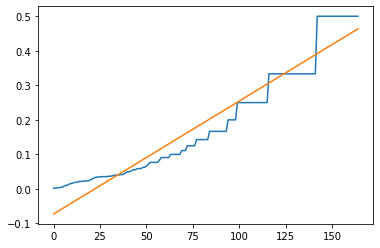

In [233]:
def notequals1(x):
    return x > 1
Filter = Count_species.apply(notequals1)
Bigger = Count_species[Filter]


def obratna(x):
    return 1/x

Values = Bigger.apply(obratna).tolist()
Indicies = list(range(1,166))
k, m, r, _, _ = scipy.stats.linregress(Indicies, Values)

def fun(x):
    return k*x + m
Funkcijske = pd.Series(Indicies).apply(fun)

plt.plot(Values)
plt.plot(Funkcijske)
plt.show()

In [234]:
k,m,r

(0.0032684372258552003, -0.07557961253270781, 0.9609359867074135)

Iz r vrednosti 0.9609 lahko sklepamo, da se vrednosti dobro prilegajo dobljeni linearni funkciji.  
Oglejmo si še obratno sorazmerna grafa.

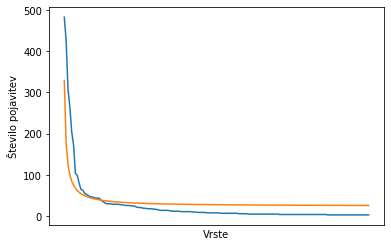

In [232]:
def fun2(x):
    return 1/(k*x) - m/k 
Funkcijske2 = pd.Series(Indicies).apply(fun2)

plt.plot(Bigger)
plt.plot(Funkcijske2)
plt.xticks([])
plt.xlabel('Vrste')
plt.ylabel('Število pojavitev')
plt.show()

Vidimo, da se dobljena funkcija relativno dobro prilega podatkom. To potrjuje hipotezo.

## Spol furson in njihovih lastnikov

In [242]:
Count_owner_g

Owner_Gender
Female      1518
Male        2606
Trans FM      33
Trans MF      40
dtype: int64

In [243]:
Count_fur_g

Fur_Gender
CrossGender     127
Female         1096
Male           3048
dtype: int64